In [1]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "E:\Python\Data Science\Potato Disease Classification\Data\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 2 1 1 1 0 1 1 1 1 1 1 1 2]


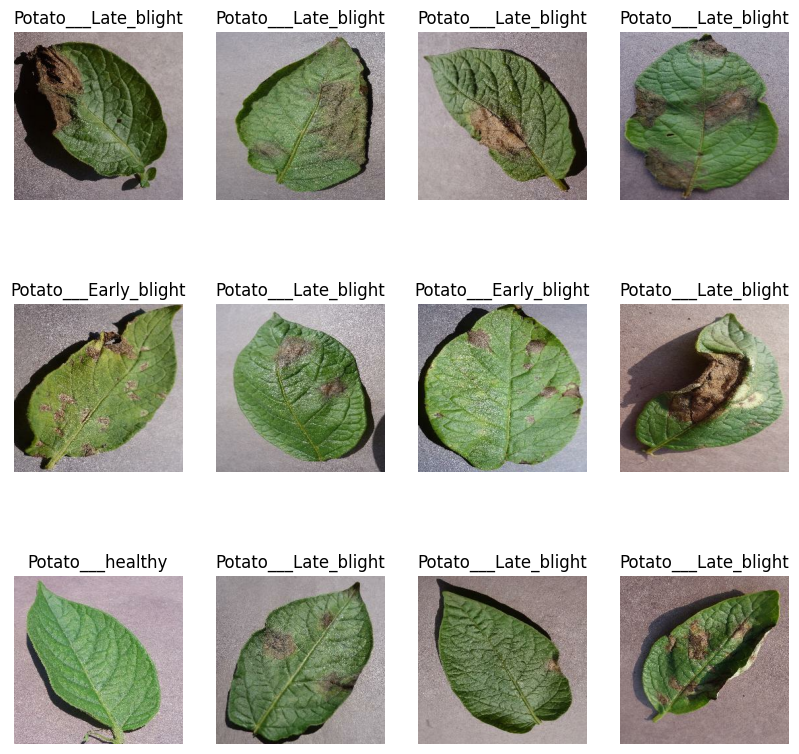

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [8]:
len(dataset)
#80% for training
#10% for validation
#10% for test

68

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_data = dataset.take(54)
len(train_data)

54

In [11]:
test_data = dataset.skip(54)
len(test_data)

14

In [12]:
validation_size = 0.1
len(dataset)*validation_size

6.800000000000001

In [13]:
validation_data  = test_data.take(6)
len(validation_data)

6

In [14]:
test_data = test_data.skip(6)
len(test_data)

8

In [15]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds  = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split * ds_size)
    validation_size = int(val_split * ds_size)
    
    train_data = ds.take(train_size)
    
    validation_data = ds.skip(train_size).take(validation_size)
    test_data = ds.skip(train_size).skip(validation_size)
    return train_data, validation_data, test_data

In [16]:
train_data, validation_data, test_data = get_dataset_partition(dataset)

In [17]:
len(train_data)
len(validation_data)
len(test_data)

8

In [18]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
reqize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
n_classes = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    reqize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model.fit(
    train_data,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose = 1,
    validation_data=validation_data
)

Epoch 1/50


54/54 [==============================] - 138s 2s/step - loss: 0.9009 - accuracy: 0.5023 - val_loss: 0.8926 - val_accuracy: 0.5104
Epoch 2/50
54/54 [==============================] - 99s 2s/step - loss: 0.6957 - accuracy: 0.6875 - val_loss: 0.4880 - val_accuracy: 0.7656
Epoch 3/50
54/54 [==============================] - 84s 2s/step - loss: 0.4608 - accuracy: 0.8131 - val_loss: 0.4105 - val_accuracy: 0.7917
Epoch 4/50
54/54 [==============================] - 82s 2s/step - loss: 0.3352 - accuracy: 0.8605 - val_loss: 0.2830 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 94s 2s/step - loss: 0.2610 - accuracy: 0.8987 - val_loss: 0.2663 - val_accuracy: 0.8854
Epoch 6/50
54/54 [==============================] - 59s 1s/step - loss: 0.2494 - accuracy: 0.9080 - val_loss: 0.2294 - val_accuracy: 0.9062
Epoch 7/50
54/54 [==============================] - 65s 1s/step - loss: 0.2121 - accuracy: 0.9172 - val_loss: 0.2102 - val_accuracy: 0.8958
Epoch 8/50
54/54 

In [25]:
scores = model.evaluate(test_data)

8/8 [==============================] - 8s 370ms/step - loss: 0.0323 - accuracy: 0.9805


In [26]:
scores

[0.032280825078487396, 0.98046875]

In [27]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['accuracy']

[0.5023148059844971,
 0.6875,
 0.8130787014961243,
 0.8605324029922485,
 0.8987268805503845,
 0.9079861044883728,
 0.9172453880310059,
 0.9276620149612427,
 0.9293981194496155,
 0.9351851940155029,
 0.9172453880310059,
 0.9276620149612427,
 0.9461805820465088,
 0.9548611044883728,
 0.9484953880310059,
 0.9461805820465088,
 0.9479166865348816,
 0.9427083134651184,
 0.9479166865348816,
 0.9675925970077515,
 0.9629629850387573,
 0.9565972089767456,
 0.9722222089767456,
 0.9716435074806213,
 0.9693287014961243,
 0.9675925970077515,
 0.9675925970077515,
 0.9606481194496155,
 0.9554398059844971,
 0.9675925970077515,
 0.9733796119689941,
 0.9681712985038757,
 0.9797453880310059,
 0.9745370149612427,
 0.9780092835426331,
 0.9756944179534912,
 0.9866898059844971,
 0.9780092835426331,
 0.9710648059844971,
 0.9820601940155029,
 0.9832175970077515,
 0.9785879850387573,
 0.9751157164573669,
 0.9438657164573669,
 0.9716435074806213,
 0.9861111044883728,
 0.9872685074806213,
 0.9733796119689941,
 0.9

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

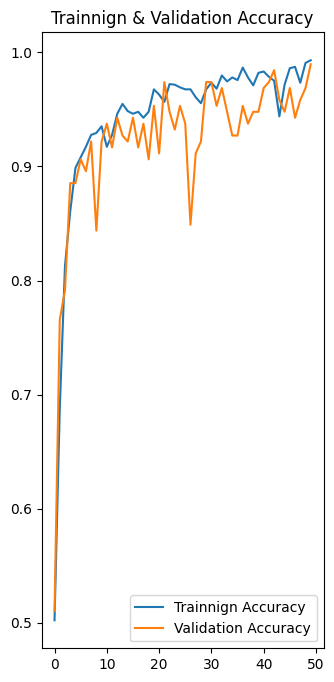

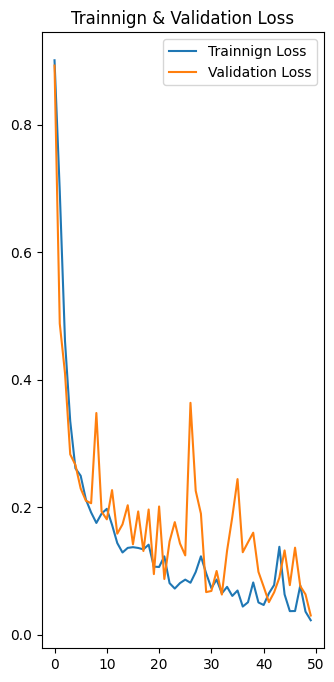

In [31]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCH), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label = "Trainnign Loss")
plt.plot(range(EPOCH), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()

First image to predict
First image actual label:  Potato___healthy
1/1 [==============================] - 0s 280ms/step
Predicted Label:  Potato___healthy


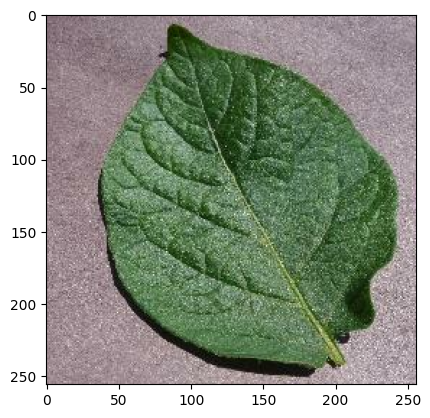

In [58]:
import numpy as np
for image_batch, label_batch in test_data.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])
    

In [79]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    prediction = model.predict(img_array)
    
    predicted_calss = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    
    return predicted_calss, confidence 

1/1 [==============================] - 0s 35ms/step


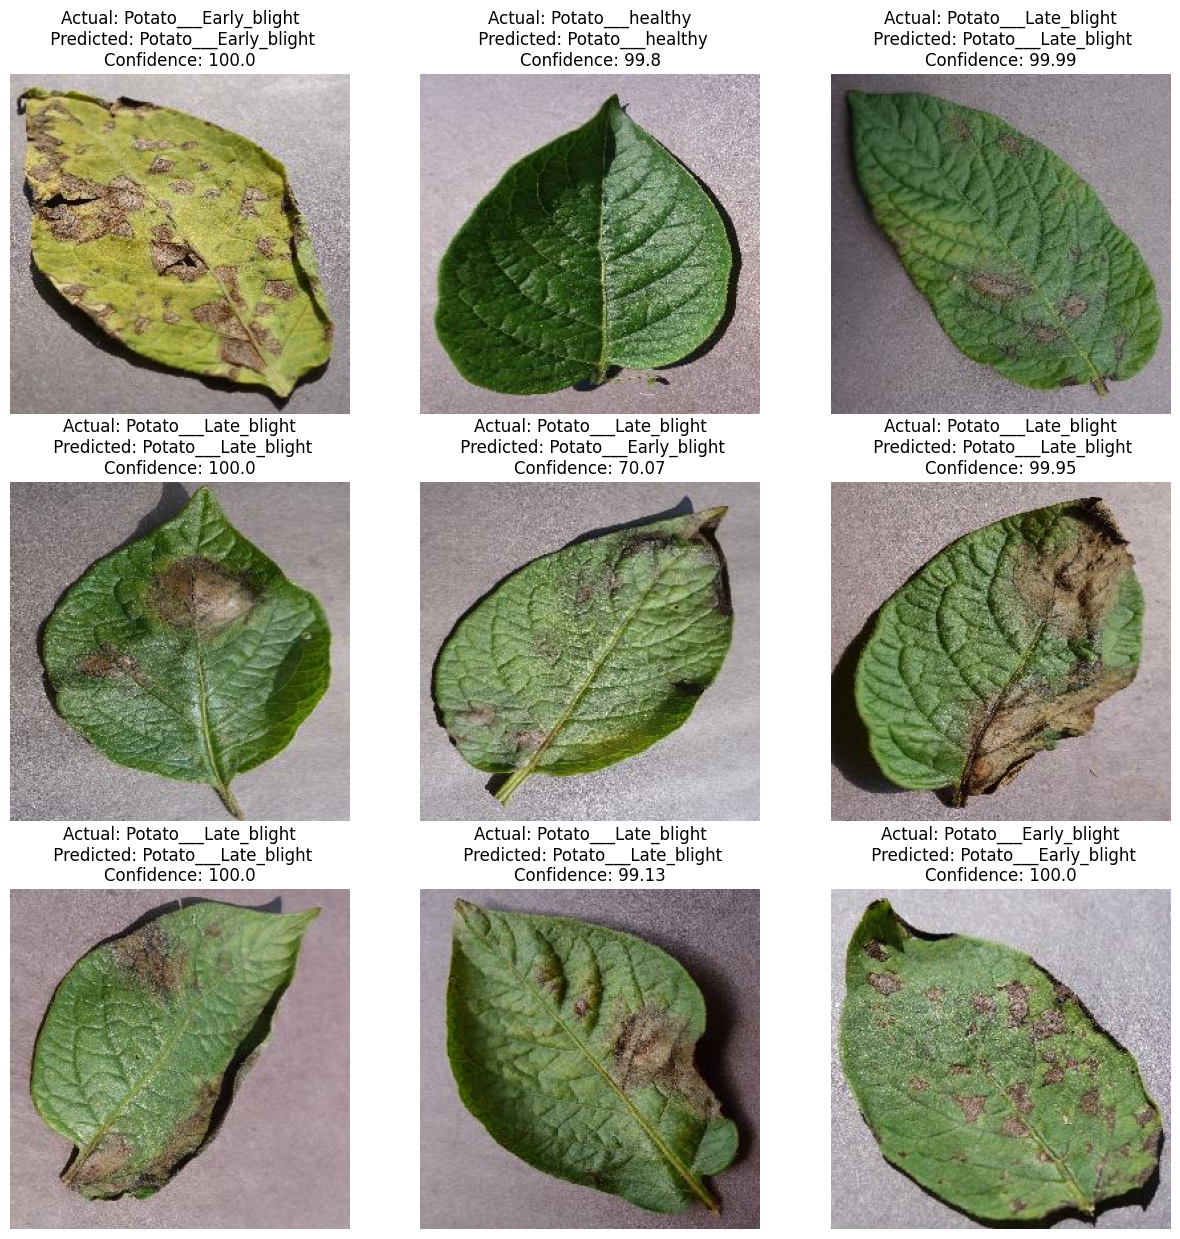

In [87]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, connfidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\nConfidence: {connfidence}")
        plt.axis("off")

In [88]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
